# FIN 514 - PS4 Q3 CRR
**Spring 2022**

This notebook provides the graphs for PS3 Q4 for the CRR model

## Packages and Configurations

The following common packages will be use on this notebook.

* numpy - [https://numpy.org/](https://numpy.org/)
* Pandas - [https://pandas.pydata.org/](https://pandas.pydata.org/)
* matplotlib - [https://matplotlib.org/](https://matplotlib.org/)
* Scipy Statistical functions - [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# ENTER INPUT FOR: start_step

start_step = 5

In [3]:
# ENTER INPUT FOR: N = num_steps

N = 100

In [4]:
# ENTER INPUT FOR: S0 = Original Stock Price

S0 = 100.0

In [5]:
# ENTER INPUT FOR: K = Excercise Price of Call Option

K = 100

In [6]:
# ENTER INPUT FOR: B = Barrier level
B = 95

In [7]:
# ENTER INPUT FOR: sigma = Annualized (Future) Volatility of Stock Price Returns

sigma = 0.3

In [8]:
# ENTER INPUT FOR: r = Annualized Continously Compounded Risk-free Rate

r = 0.1

In [9]:
# ENTER INPUT FOR: T = Time Length of Option in which to Exercise (In Years)

T = 0.2

In [10]:
# ENTER INPUT FOR: q = Rate of continuous dividend paying asset 

q = 0

## Binomial Model Function

In [11]:

def CRRDB_model(S0, K, B, T, r, sigma, start_step, N):
    """
    Function to calculates the value of a European Put Option using the CRR Binomial Model 
    
    S0: Original Stock Price
    K: Excercise Price of Call Option
    T: Time Length of Option in which to Exercise (In Years)
    r: Annualized Continously Compounded Risk-free Rate
    sigma: Annualized (Future) Volatility of Stock Price Returns
    start_step: Starting time step
    N: Number of time steps
    
    """    
    
    # LIST TO SAVE RESULTS
    crrdb_result = []
        
    # CREATE TWO DIMENSIONAL ARRAY OF SIZE [N+1,N+1] TO STORE ALL STEPS
    # option_value[N+1, N+1]
    option_value = np.zeros([10*N+1, 10*N+1])

    # CREATE ARRAY FOR STOCK PRICES OF SIZE N+1,N+1
    # stock_value[N+1, N+1]
    stock_value = np.zeros([10*N+1, 10*N+1])    
    
    # FOR LOOP STATEMENT: For a Binomial Tree from start_step to N
    for n1 in range(start_step, N+1):
        
        n = n1*10 
        j1 = n1*2
        j2 = n1*4
        j3 = n1*6
        j4 = n1*8
        
        delta = T / n
        u = np.exp(sigma * (delta)**0.5)
        d = 1 / u
        qu = (np.exp(r * delta) - d) / (u - d)
        qd = 1 - qu
        
        
    # CALCULATE OPTION VALUES AT CERTAIN STEPS AND POSITIONS WITHIN THE BINOMIAL TREE:
    # Start at the last step number because we are going to be moving backwards from step number n to step number 0
    # Hint: j = n and range stop = j 
        j = n 
        
        for i in range(0, j+1):    
    # Then, calculate the value of the option at that exact position within the binomial tree
    # REMEMBER: the value of the option is MAX(stock_value - Exercise Price, 0)
    # Hint: V = np.maximum(S - K, 0)
            stock_value[j, i] = S0 * (u**i) * (d**(j - i))
            option_value[j, i] = np.maximum(stock_value[j, i]-K, 0)

            if stock_value[j, i] < B:
                sd = stock_value[j, i]
                
        lamda = (sd*u*u - B)/(sd*u*u - sd)         
    # Now, lets calculate the option value at each position (i) within the binomial tree at each previous step number (j) until time zero
    # First, start with a FOR iteration on the step number
    # Step backwards (Step -1) for the step number (j) because you are working backwards from the 2nd to last step (j - 1) to step number 0 
    # Hint: start = (Step -1), stop = -1 (end of range is exclusive, stops at 0 when stop=-1) , step = -1 (moving backwards)
        for j in range(n-1, -1, -1):

    # Then, create a FOR iteration on the position number (i), from the top position all the way down to the bottom position of 0 (all down jumps)
    # Hint: the top positions always equals j (the maximum number of possible up jumps at any time)
    # Hint: use Step -1, since you are moving from the top to the bottom. stop = -1 (end of range is exclusive, stops at 0 when stop=-1)        
            for i in range(j, -1, -1):
            
    # Now, calculation the PV of the option values at that specific position and step number
    # Hint: V = e^(-r x Delta) (qu x Vup + qd x Vdown)            
                pv = np.exp(-r * delta) * (qu * option_value[j + 1, i + 1] + qd * option_value[j + 1, i])
                option_value[j, i] = pv
                stock_value[j, i] = S0 * (u**i) * (d**(j - i))
                if (j == j1 or j == j2 or j == j3 or j == j4):
                    if stock_value[j, i] < B:
                        option_value[j, i] = 0

        
    # RELAY OUTPUTS TO DICTIONARY
        output = {'num_steps': n, 'CRR': option_value[0,0], 'lambda': lamda}
        crrdb_result.append(output)

    return crrdb_result


In [12]:
crr = CRRDB_model(S0, K, B, T, r, sigma, start_step, N)

In [13]:
exact = 5.6711051343

In [14]:
# CREATE A DATAFRAME FROM THE BINOMIAL MODEL OUTPUT
df = pd.DataFrame.from_dict(crr)

In [15]:
# CALCULATE THE ERROR FROM BINOMIAL MODEL COMPARED WITH BLACK-SHCOLES
df['error_CRR'] = df["CRR"] - exact 

In [16]:
# INSPECT THE FIRST ROWS OF THE DATAFRAME
df.head()

,num_steps,CRR,lambda,error_CRR
0,50,5.787329,0.356031,0.116224
1,60,5.697745,0.485034,0.026640
2,70,5.620431,0.603196,-0.050674
3,80,5.553093,0.712860,-0.118012
4,90,5.493881,0.815631,-0.177224


In [17]:
# INSPECT THE LAST ROWS OF THE DATAFRAME
df.tail()

,num_steps,CRR,lambda,error_CRR
91,960,5.597513,0.923147,-0.073592
92,970,5.592287,0.953798,-0.078819
93,980,5.587114,0.984284,-0.083991
94,990,5.749425,0.014734,0.078320
95,1000,5.744440,0.045155,0.073335


In [18]:
# EXPORT THE DATA TO A CSV FILE
df.to_csv("Data/Q4crrdb.csv", index=False)

### Binomial Model Error Rate

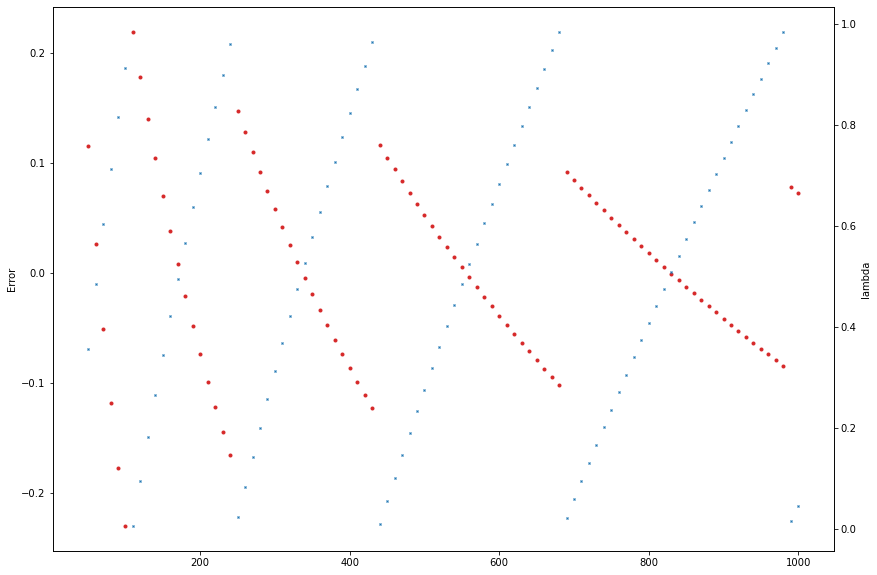

In [19]:
fig, ax1 = plt.subplots(figsize=(14,10))
ax1.set_ylabel('Error')
ax1.plot(df['num_steps'], df['error_CRR'], 'o', markersize=3, color = 'tab:red')
ax2 = ax1.twinx()
ax2.set_ylabel('lambda')
ax2.plot(df['num_steps'], df['lambda'], 'x', markersize=2, color = 'tab:blue')
plt.savefig('Images/Q4_crrdb.png')
plt.show()